# Problem

In [1]:
%%latex
In Figure \ref{fig:probfig}, the radius of the small circle (black) is the same as the edge length of a square.
What is the value of $\tan(\angle \mathrm{ACB})$?

\begin{figure}[H]
  \centering
  \includegraphics[width=0.5\linewidth]{probfig.jpeg}
  \caption{Problem's figure}
  \label{fig:probfig}
\end{figure}


<IPython.core.display.Latex object>

# Solution

In [2]:
%%latex
% https://tex.stackexchange.com/questions/86044/represent-an-arc-over-letters
\settowidth{\mywidth}{AB}
From Figure \ref{fig:probfig}, the inscribed angle $\angle \mathrm{ACB}$ has its intercepted arc $\bigfrown{\mathrm{AB}}$
(with angle $\angle \mathrm{AOB}$).
Because inscribed angle is half of its intercepted arc, we have:
    \begin{equation}
    \angle \mathrm{ACB} = \frac{1}{2} \times \angle \mathrm{AOB}.
    \end{equation}

Let point D (as shown in Figure \ref{fig:figwithsizes}: \Nameref{fig:figwithsizes}) be the bottom center (crossing point) of the 2 squares.
Due to symmetry $\angle \mathrm{AOD} = \frac{1}{2} \times \angle \mathrm{AOB}$, and hence:
    \begin{equation}
    \tan( \angle \mathrm{ACB} ) = \tan({\angle \mathrm{AOD}}).
    \end{equation}

Figure \ref{fig:figwithsizes} shows Figure \ref{fig:probfig} which is annotated with sizes relevant to the solution.
Let point O be the center of the big red circle. Also, let the edge length of the square (which is also the radius of the small black circle) and
the radius of the big red circle be $a$ and $R$, respectively.

<IPython.core.display.Latex object>

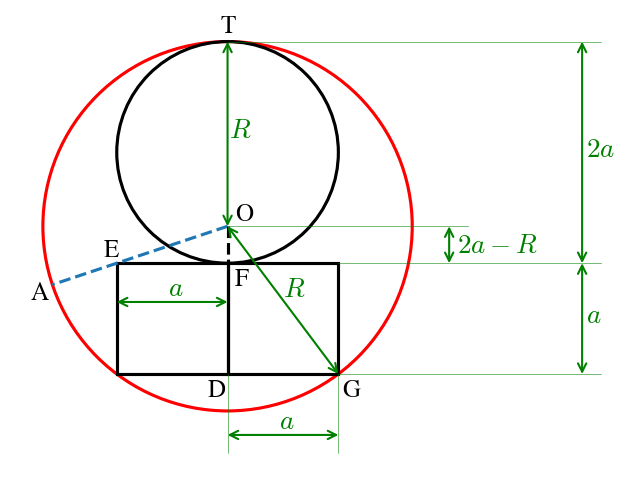

In [3]:
%matplotlib inline
# patches: https://note.nkmk.me/python-matplotlib-patches-circle-rectangle/
# patches: https://www.codespeedy.com/how-to-draw-shapes-in-matplotlib-with-python/
# patches: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

# matplotlib.rcParams['figure.figsize'] = 6, 6 # Resize the figure, in inches.
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def annotate_dim(ax,xyfrom,xyto,text=None,fontsize=15, color='black', xoffset=0.0, yoffset=0.0, lnwid=1.0, boxfc='white'):

    if text is None:
        text = str(np.sqrt( (xyfrom[0]-xyto[0])**2 + (xyfrom[1]-xyto[1])**2 ))

    ax.annotate("",xyfrom,xyto,arrowprops=dict(color=color, arrowstyle='<->', shrinkA=0, shrinkB=0, lw=lnwid))
    ax.text((xyto[0]+xyfrom[0])/2+xoffset,(xyto[1]+xyfrom[1])/2+yoffset,text,fontsize=fontsize,color=color,
          bbox=dict(facecolor=boxfc, edgecolor='none', boxstyle='round,pad=0.02'))


def annotate_dim_anchor(ax, xyfrom, xyto, ancfrom, ancto,
                        text=None,fontsize=15, color='black', xoffset=0.0, yoffset=0.0, lnwid=1.0, boxfc='white',
                        anclnwid=0.2, extend=2.0):

    if text is None:
        text = str(np.sqrt( (xyfrom[0]-xyto[0])**2 + (xyfrom[1]-xyto[1])**2 ))

    # Line: ancfrom - xyfrom & ancto - xyto
    eps = 0.0001
    if abs(xyfrom[0] - ancfrom[0])>eps or abs(xyfrom[1] - ancfrom[1])>eps:
        extx = xyfrom[0]
        exty = xyfrom[1]
        if abs(xyfrom[0] - ancfrom[0])<=eps:
            exty = xyfrom[1] + extend * (xyfrom[1] - ancfrom[1])/abs(xyfrom[1] - ancfrom[1])
        elif abs(xyfrom[1] - ancfrom[1])<=eps:
            extx = xyfrom[0] + extend * (xyfrom[0] - ancfrom[0])/abs(xyfrom[0] - ancfrom[0])
        else:
            seglen = np.sqrt( (xyfrom[0]-ancfrom[0])**2 + (xyfrom[1]-ancfrom[1])**2 )
            extx = xyfrom[0] + extend * (xyfrom[0]-ancfrom[0]) / seglen
            exty = xyfrom[1] + extend * (xyfrom[1]-ancfrom[1]) / seglen
        lancfr = plt.Line2D( (ancfrom[0],  extx), (ancfrom[1],  exty), color=color, lw=anclnwid )
        ax.add_line(lancfr)

    if abs(xyto[0] - ancto[0])>eps or abs(xyto[1] - ancto[1])>eps:
        extx = xyto[0]
        exty = xyto[1]
        if abs(xyto[0] - ancto[0])<=eps:
            exty = xyto[1] + extend * (xyto[1] - ancto[1])/abs(xyto[1] - ancto[1])
        elif abs(xyto[1] - ancto[1])<=eps:
            extx = xyto[0] + extend * (xyto[0] - ancto[0])/abs(xyto[0] - ancto[0])
        else:
            seglen = np.sqrt( (xyto[0]-ancto[0])**2 + (xyto[1]-ancto[1])**2 )
            extx = xyto[0] + extend * (xyto[0]-ancto[0]) / seglen
            exty = xyto[1] + extend * (xyto[1]-ancto[1]) / seglen
        lancto = plt.Line2D( (ancto[0],  extx), (ancto[1],  exty), color=color, lw=anclnwid )
        ax.add_line(lancto)

    ax.annotate("",xyfrom,xyto,arrowprops=dict(color=color, arrowstyle='<->', shrinkA=0, shrinkB=0, lw=lnwid))
    ax.text((xyto[0]+xyfrom[0])/2+xoffset,(xyto[1]+xyfrom[1])/2+yoffset,text,fontsize=fontsize,color=color,
          bbox=dict(facecolor=boxfc, edgecolor='none', boxstyle='round,pad=0.02'))


# fig = plt.figure()
ax = plt.axes()

a = 3.0
R = 5.0*a/3.0
ptO = (a, 3*a-R)
vecOA = (0.0-ptO[0], a-ptO[1])
absvecOA = np.sqrt( (vecOA[0])**2 + (vecOA[1])**2 )
uvecOA = ( vecOA[0]/absvecOA, vecOA[1]/absvecOA )
ptA = ( ptO[0] + R*uvecOA[0],  ptO[1] + R*uvecOA[1] )
ptD = (a, 0.0)
ptTop = (a, 3*a)
ptE = (0.0, a)
ptF = (a, a)
ptG = (2*a, 0.0)
shplw=1.5

# fc = face color, ec = edge color
c = patches.Circle(xy=(a, 2*a), radius=a, fc='none', ec='k', lw=shplw, ls='-')  # default lw=1, ls='-'  or '-.' or '--'
cbig = patches.Circle(xy=ptO, radius=R, fc='none', ec='r', lw=shplw, ls='-')
r1 = patches.Rectangle(xy=(0, 0), width=a, height=a, ec='#000000', lw=shplw, fill=False)
r2 = patches.Rectangle(xy=(a, 0), width=a, height=a, ec='#000000', lw=shplw, fill=False)
lineOA = plt.Line2D((ptO[0], ptA[0]), (ptO[1], ptA[1]), ls='--', lw=shplw)
lineOF = plt.Line2D((ptO[0], ptF[0]), (ptO[1], ptF[1]), ls='--', lw=shplw, color='k')
ax.add_patch(cbig)
ax.add_patch(c)
ax.add_patch(r1)
ax.add_patch(r2)
ax.add_line(lineOA)
ax.add_line(lineOF)

plt.text(ptO[0]+0.2, ptO[1]+0.15, 'O', fontsize=12)
plt.text(ptA[0]-0.6, ptA[1]-0.4, 'A', fontsize=12)
plt.text(ptE[0]-0.35, ptE[1]+0.18, 'E', fontsize=12)
plt.text(ptF[0]+0.18, ptF[1]-0.6, 'F', fontsize=12)
plt.text(ptTop[0]-0.2, ptTop[1]+0.25, 'T', fontsize=12)
annotate_dim(ax, ptO, ptG, '$R$', fontsize=13, color='green', xoffset=0.0, yoffset=0.1, lnwid=1.0, boxfc='none')
annotate_dim(ax, ptO, ptTop, '$R$', fontsize=13, color='green', xoffset=0.05, yoffset=-0.1, lnwid=1.0, boxfc='none')
annotate_dim(ax, (0.0, 0.65*a), (a, 0.65*a), '$a$', fontsize=13, color='green', xoffset=-0.12, yoffset=0.17, lnwid=1.0, boxfc='none')

dimanclw = 0.25
# anchor and dimension point
dppos = 4.2
ancp1 = (2*a, a)
dp1 = (dppos*a, a)
dp2 = (dppos*a, 3*a)
hige = 0.5
annotate_dim_anchor(ax,  dp1, dp2, ancp1, ptTop,
             '$2a$', fontsize=13, color='green', xoffset=0.11, yoffset=-0.1, lnwid=1.0, boxfc='none', 
            anclnwid=dimanclw, extend=hige)
dp3 = (dppos*a, 0.0)
annotate_dim_anchor(ax,  dp1, dp3, dp1, ptG,
             '$a$', fontsize=13, color='green', xoffset=0.11, yoffset=-0.1, lnwid=1.0, boxfc='none', 
            anclnwid=dimanclw, extend=hige)

dppos2 = 3.0
dp4 = (dppos2*a, a)
dp5 = (dppos2*a, ptO[1])
annotate_dim_anchor(ax,  dp4, dp5, dp4, ptO,
             '$2a-R$', fontsize=13, color='green', xoffset=0.2, yoffset=-0.2, lnwid=1.0, boxfc='none', 
            anclnwid=dimanclw, extend=hige)

dppos3 = -0.55
dpD = (ptD[0], dppos3*a)
dpG = (ptG[0], dppos3*a)
annotate_dim_anchor(ax,  dpD, dpG, ptD, ptG,
             '$a$', fontsize=13, color='green', xoffset=-0.12, yoffset=0.17, lnwid=1.0, boxfc='none', 
            anclnwid=dimanclw, extend=hige)

# annotate_dim_anchor(ax,  (dpD[0]-1, dpD[1]-1), (dpG[0]+2, dpG[1]-3), ptD, ptG,
#              '$a$', fontsize=13, color='green', xoffset=-0.12, yoffset=0.17, lnwid=1.0, boxfc='none', 
#             anclnwid=dimanclw, extend=hige)

plt.text(ptD[0]-0.55, ptD[1]-0.6, 'D', fontsize=12)
plt.text(ptG[0]+0.1, ptG[1]-0.6, 'G', fontsize=12)

plt.axis('off')
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

In [4]:
%%latex
Let $\overline{\mathrm{XY}}$ and $\lvert\overline{\mathrm{XY}}\rvert$ be line segment $\mathrm{XY}$ and its length, respectively. 
Looking at right triangle $\triangle\mathrm{ODG}$ and applying Pythagoras' theorem:
\begin{align*}
\lvert\overline{\mathrm{OD}}\rvert^2 + \lvert\overline{\mathrm{DG}}\rvert^2 = \lvert\overline{\mathrm{OG}}\rvert^2
& \Rightarrow \lvert\overline{\mathrm{OD}}\rvert^2 + a^2 = R^2 \\
& \Rightarrow \lvert\overline{\mathrm{OD}}\rvert = \sqrt{R^2 - a^2}.
\addtocounter{equation}{1}
\label{eq:lenOD}  \tag{\theequation}
\end{align*}
Also from Figure \ref{fig:figwithsizes}, we have:
\begin{align*}
\lvert\overline{\mathrm{OD}}\rvert + \lvert\overline{\mathrm{OT}}\rvert = \lvert\overline{\mathrm{DT}}\rvert
& \Rightarrow \lvert\overline{\mathrm{OD}}\rvert + R = \lvert\overline{\mathrm{DF}}\rvert + \lvert\overline{\mathrm{FT}}\rvert \\
& \Rightarrow \lvert\overline{\mathrm{OD}}\rvert + R = a + 2a \\
& \Rightarrow \lvert\overline{\mathrm{OD}}\rvert = 3a - R.
\addtocounter{equation}{1}
\label{eq:lenOD2}  \tag{\theequation}
\end{align*}
From equation \eqref{eq:lenOD} and \eqref{eq:lenOD2}, we have:
\begin{align*}
% \require{cancel} 
\sqrt{R^2 - a^2} = 3a - R
& \Rightarrow R^2 - a^2 = (3a - R)^2 \\
& \Rightarrow \cancel{R^2} - a^2 = 9a^2 - 6aR + \cancel{R^2} \\
& \Rightarrow 6aR = 9a^2 + a^2 = 10a^2  \\
& \Rightarrow 6\cancel{a}R = 10a^{\cancel{2}}  && (a\neq 0) \\
& \Rightarrow R = \frac{5}{3}a.
\addtocounter{equation}{1}
\label{eq:relation_Ra}  \tag{\theequation}
\end{align*}


<IPython.core.display.Latex object>

In [5]:
%%latex
Now look at right triangle $\triangle\mathrm{EFO}$.
\begin{align*}
\tan(\angle \mathrm{AOD}) = \tan(\angle \mathrm{EOF}) 
    &=  \frac{\lvert\overline{\mathrm{EF}}\rvert}{\lvert\overline{\mathrm{FO}}\rvert} \\
    &= \frac{a}{2a - R} && (\text{from Figure }\ref{fig:figwithsizes}) \\
    &= \frac{a}{2a - \frac{5}{3}a} && (\text{substituting $R$ from equation \eqref{eq:relation_Ra}}) \\
    &=  \frac{\cancel{a}}{\frac{1}{3}\cancel{a}} \\
    &=  3.
\addtocounter{equation}{1}
\label{eq:answer}  \tag{\theequation}
\end{align*}
Hence, $\tan(\angle\mathrm{ACB}) = \tan(\angle \mathrm{AOD}) = 3$. $\blacksquare$

<IPython.core.display.Latex object>